In [1]:
import sys
!{sys.executable} -m pip install regex

In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv("car data.csv")
y=data.iloc[:,2]
data=data.drop('Owner', axis=1)
data=data.drop('Car_Name', axis=1)
data=data.drop('Selling_Price', axis=1)
x=data.iloc[:,:]
x

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,2014,5.59,27000,Petrol,Dealer,Manual
1,2013,9.54,43000,Diesel,Dealer,Manual
2,2017,9.85,6900,Petrol,Dealer,Manual
3,2011,4.15,5200,Petrol,Dealer,Manual
4,2014,6.87,42450,Diesel,Dealer,Manual
...,...,...,...,...,...,...
296,2016,11.60,33988,Diesel,Dealer,Manual
297,2015,5.90,60000,Petrol,Dealer,Manual
298,2009,11.00,87934,Petrol,Dealer,Manual
299,2017,12.50,9000,Diesel,Dealer,Manual


In [4]:
temp_cols=x.columns.tolist()
new_cols=temp_cols[1:] + temp_cols[0:1]
x=x[new_cols]
x

,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Year
0,5.59,27000,Petrol,Dealer,Manual,2014
1,9.54,43000,Diesel,Dealer,Manual,2013
2,9.85,6900,Petrol,Dealer,Manual,2017
3,4.15,5200,Petrol,Dealer,Manual,2011
4,6.87,42450,Diesel,Dealer,Manual,2014
...,...,...,...,...,...,...
296,11.60,33988,Diesel,Dealer,Manual,2016
297,5.90,60000,Petrol,Dealer,Manual,2015
298,11.00,87934,Petrol,Dealer,Manual,2009
299,12.50,9000,Diesel,Dealer,Manual,2017


In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# categorical_features = [ "Fuel_Type","Selling_type","Transmission","Car_Name"]
categorical_features = [ "Fuel_Type","Selling_type","Transmission"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer ([ ("one_hot",
one_hot,
categorical_features)],
remainder="passthrough")
x1= transformer.fit_transform(x)
# x1=np.array(x1)
x1=pd.DataFrame(x1)
x1.columns


RangeIndex(start=0, stop=10, step=1)

In [6]:
x=x1
x

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,5.59,27000.0,2014.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,9.54,43000.0,2013.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.85,6900.0,2017.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.15,5200.0,2011.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,6.87,42450.0,2014.0
...,...,...,...,...,...,...,...,...,...,...
296,0.0,1.0,0.0,1.0,0.0,0.0,1.0,11.60,33988.0,2016.0
297,0.0,0.0,1.0,1.0,0.0,0.0,1.0,5.90,60000.0,2015.0
298,0.0,0.0,1.0,1.0,0.0,0.0,1.0,11.00,87934.0,2009.0
299,0.0,1.0,0.0,1.0,0.0,0.0,1.0,12.50,9000.0,2017.0


In [7]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=1)

In [8]:
# from sklearn.linear_model import LinearRegression
# l=LinearRegression()

from sklearn.tree import DecisionTreeRegressor
l=DecisionTreeRegressor(random_state=0)

# from sklearn.svm import SVR
# l=SVR()

# from sklearn.ensemble import RandomForestRegressor
# l=RandomForestRegressor()


l.fit(train_x,train_y)

DecisionTreeRegressor(random_state=0)

In [9]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
y_p=l.predict(test_x)
y=np.array(test_y)
y1=np.array(y_p)
np.set_printoptions(precision=4)
print(y)
print(y1)

[ 7.4   4.    0.5   3.15  1.25  5.75  0.75  2.65  8.4   0.48  8.35  3.45
  5.3   4.1   0.2   0.35  6.85  6.15  5.11  7.45  6.    3.25  5.25  7.5
  2.5   3.25  3.35  0.6   0.3   0.35  0.3   0.16  4.4  19.99 23.    4.75
  3.75  1.05  0.2   4.5  10.25 12.9   0.2   4.6   3.95  3.75  7.2   5.95
  7.25  1.35  3.35  0.48  2.    4.    1.1   0.2  18.75  0.5   6.45  5.65
  0.25]
[ 6.4   2.7   0.4   2.9   1.05  4.4   0.8   2.9   8.5   0.6   9.1   3.5
  5.5   4.    0.12  0.5   6.    5.95  4.5   6.    5.5   3.    4.    7.5
  4.    3.1   3.    0.75  0.15  0.45  0.25  0.25  5.25 23.   23.    4.
  3.5   1.05  0.25  3.5  10.9  12.5   0.38  4.    4.75  4.5   6.    8.25
  6.    1.11  4.5   0.48  2.7   4.75  1.15  0.1  16.    0.4   6.5   6.1
  0.35]


In [11]:
from sklearn.metrics import mean_squared_error, r2_score
print("R^2:",r2_score(y,y1))
print("mean_squared_error:",mean_squared_error(y,y1))
print("Mean_absolute_error:",mean_absolute_error(y,y1))

R^2: 0.9659623178079546
mean_squared_error: 0.7384196721311475
Mean_absolute_error: 0.560327868852459


Text(0, 0.5, 'Predicted')

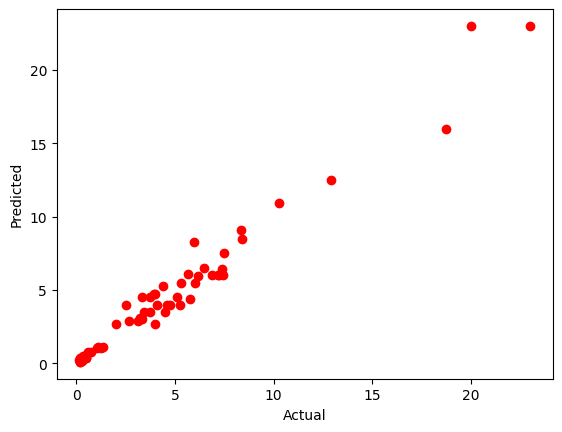

In [16]:
import matplotlib.pyplot as plt
plt.scatter(y,y1,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')